# 🧬 Bioinformatics Lab Exercises: DNA/RNA/Protein Sequences

This notebook contains 5 exercises to practice sequence operations, translation, reverse translation, and simple data analysis using Biotite and Python.

## Imports and Setup

In [2]:
import biotite.sequence.io.fasta as fasta
from biotite.sequence import NucleotideSequence, ProteinSequence
import matplotlib.pyplot as plt
import numpy as np
import random

## Exercise 1: Basic Sequence Operations
**Objectives:**
- Load a FASTA file
- Compute nucleotide frequencies and GC content
- Translate DNA to protein

In [3]:
# Example FASTA sequences
fasta_content = ">Seq1\nATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG\n" +\
                ">Seq2\nGGGCCCAAATTTGGGCCCAGATATATATATGGGCCCTTT\n"

# Write to a file for demonstration
with open("exercise1.fasta", "w") as f:
    f.write(fasta_content)

# Read FASTA
fasta_file = fasta.FastaFile.read("exercise1.fasta")
headers = fasta_file.keys()

# Compute nucleotide frequencies and GC content
nucleotide_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for header in headers:
    for seq_bit in fasta.get_sequence(fasta_file, header):
        nucleotide_counts[seq_bit] += 1
GC_content = (nucleotide_counts["G"] + nucleotide_counts["C"])/sum(nucleotide_counts.values())

# printing at the end
print(f"Nucleotide counts: {nucleotide_counts}")
print(f"GC content: {100*GC_content:.2f}%")


Nucleotide counts: {'A': 18, 'C': 17, 'G': 24, 'T': 19}
GC content: 52.56%


## Exercise 2: Reverse Translation (Protein -> DNA)
**Objectives:**
- Implement a function to generate a DNA sequence from a protein sequence
- Use a codon table

In [8]:
from typing import Optional

# Simplified codon table amino acids : codons
codon_table = {
    'A': ['GCT','GCC','GCA','GCG'],
    'C': ['TGT','TGC'],
    'D': ['GAT','GAC'],
    'E': ['GAA','GAG'],
    'F': ['TTT','TTC'],
    'G': ['GGT','GGC','GGA','GGG'],
    'H': ['CAT','CAC'],
    'I': ['ATT','ATC','ATA'],
    'K': ['AAA','AAG'],
    'L': ['TTA','TTG','CTT','CTC','CTA','CTG'],
    'M': ['ATG'],
    'N': ['AAT','AAC'],
    'P': ['CCT','CCC','CCA','CCG'],
    'Q': ['CAA','CAG'],
    'R': ['CGT','CGC','CGA','CGG','AGA','AGG'],
    'S': ['TCT','TCC','TCA','TCG','AGT','AGC'],
    'T': ['ACT','ACC','ACA','ACG'],
    'V': ['GTT','GTC','GTA','GTG'],
    'W': ['TGG'],
    'Y': ['TAT','TAC'],
    '*': ['TAA','TAG','TGA']  # Stop codons
}

import math
import itertools

# Implement reverse translation function
# Optionally, specify the number of sequences to generate
# What is the maximal number of sequences that can be generated from a protein sequence?
def reverse_translate(protein_seq: str, codon_table: dict = codon_table, sequence_num: Optional[int] = None) -> NucleotideSequence:
    sequence_options = list(map(lambda s: codon_table[s], protein_seq))
    max_options = math.prod(map(lambda l: len(l), sequence_options))

    nucleotide_sequences = []
    for option in itertools.islice(itertools.product(*sequence_options), sequence_num):
        nucleotide_sequences.append(NucleotideSequence(''.join(option)))

    return nucleotide_sequences[0] if sequence_num == 1 else nucleotide_sequences

# Example protein sequence
prot = ProteinSequence('MGR*')
dna_candidate = reverse_translate(prot)
print(f"Protein: {prot}")
print(f"Reverse-translated DNA: {dna_candidate}")

Protein: MGR*
Reverse-translated DNA: [NucleotideSequence("ATGGGTCGTTAA", ambiguous=False), NucleotideSequence("ATGGGTCGTTAG", ambiguous=False), NucleotideSequence("ATGGGTCGTTGA", ambiguous=False), NucleotideSequence("ATGGGTCGCTAA", ambiguous=False), NucleotideSequence("ATGGGTCGCTAG", ambiguous=False), NucleotideSequence("ATGGGTCGCTGA", ambiguous=False), NucleotideSequence("ATGGGTCGATAA", ambiguous=False), NucleotideSequence("ATGGGTCGATAG", ambiguous=False), NucleotideSequence("ATGGGTCGATGA", ambiguous=False), NucleotideSequence("ATGGGTCGGTAA", ambiguous=False), NucleotideSequence("ATGGGTCGGTAG", ambiguous=False), NucleotideSequence("ATGGGTCGGTGA", ambiguous=False), NucleotideSequence("ATGGGTAGATAA", ambiguous=False), NucleotideSequence("ATGGGTAGATAG", ambiguous=False), NucleotideSequence("ATGGGTAGATGA", ambiguous=False), NucleotideSequence("ATGGGTAGGTAA", ambiguous=False), NucleotideSequence("ATGGGTAGGTAG", ambiguous=False), NucleotideSequence("ATGGGTAGGTGA", ambiguous=False), Nucleot

## Exercise 3: mRNA Exon Sequence Retrieval (Mock Data)
**Objectives:**
- Simulate mRNA exons
- Concatenate exons and translate

In [35]:
# Mock sequence and exons
full_sequence = 'ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAGATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAGATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG'
exon_indices = [[0,15], [21,27], [31,37]]

# Concatenate exons and translate to protein
exons = list(map(lambda ind: full_sequence[ind[0]:ind[1]], exon_indices))
exons_joined = ''.join(exons)

mrna = NucleotideSequence(exons_joined)

protein_seq = mrna.translate(complete=True)
print(f"mRNA sequence: {mrna}")
print(f"Translated protein: {protein_seq}")

mRNA sequence: ATGGCCATTGTAATGTGAAAGCCCGAT
Translated protein: MAIVM*KPD


{'A': np.int64(8), 'C': np.int64(5), 'G': np.int64(7), 'T': np.int64(7)}


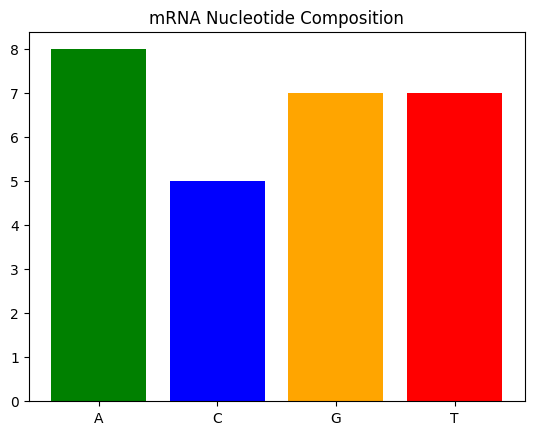

In [ ]:
# Visualization: show nucleotide composition of mRNA as barplot with color=['green','blue','orange','red']
counts = mrna.get_symbol_frequency()
plt.bar(counts.keys(), counts.values(), color=['green', 'blue', 'orange', 'red'])
plt.title('mRNA Nucleotide Composition')
plt.show()

## Optional Exercise 3b: Fetch Real Gene Exons from NCBI
**Objectives:**
- Use NCBI Entrez API to retrieve gene sequence
- Extract exons/CDS and translate to protein

In [7]:
# Optional: requires Biopython
from Bio import Entrez, SeqIO


Entrez.email = "janek.wyrzykowski@gmail.com"  # required by NCBI

def fetch_gene_protein(gene_name: str, organism: str = "Homo sapiens") -> Optional[str]:
    """ Fetching mRNA sequence from NCBI by gene name and organism """

    # search for gene
    handle = Entrez.esearch(db="nucleotide", term=f"{gene_name}[Gene] AND {organism}[Organism]", retmax=1)
    record = Entrez.read(handle)
    handle.close()
    if not record["IdList"]:
        print("Gene not found.")
        return None

    # fetch gene
    gene_id = record["IdList"][0]
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
    gb_record = SeqIO.read(handle, "genbank")
    handle.close()

    # extract exons
    exons = []
    for feature in gb_record.features:
        if feature.type == "CDS":
            exon_seq = feature.location.extract(gb_record).seq
            exons.append(str(exon_seq))
    if not exons:
        print("No CDS/exons found for this gene.")
        return None
    mrna_seq = "".join(exons)
    return mrna_seq

# Obtain mRNA sequence for BRCA1 gene and translate to protein sequence
gene_name = "BRCA1"
mrna_sequence = fetch_gene_protein(gene_name)

# FIXME: for some reason does not find cds/exons


No CDS/exons found for this gene.


## Exercise 4: Translation Efficiency Simulation
**Objectives:**
- Calculate translation time based on codon availability
- Determine mean translation time for a protein

Per-residue translation times: [np.float64(0.06666666666666667), np.float64(0.12152777777777778), np.float64(0.14312169312169312), np.float64(0.0)]
Mean translation time: 0.08


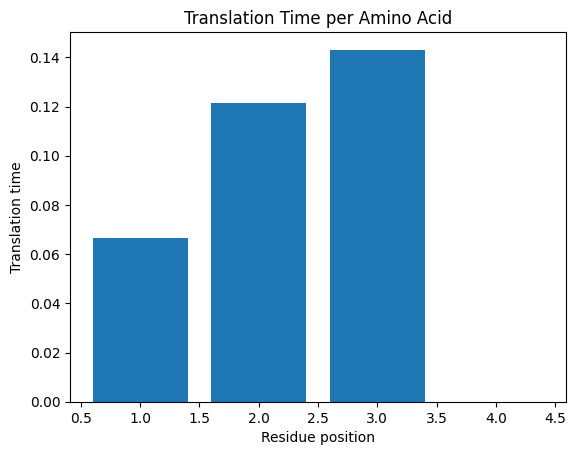

In [36]:
# Example tRNA abundance table (arbitrary values)
from numpy import ndarray

tRNA_table = {
    'GCT': 5,'GCC': 10,'GCA': 4,'GCG': 8,
    'ATG': 15,
    'GGT': 8,'GGC': 12,'GGA': 6,'GGG': 9,
    'TAA': 0,'TAG': 0,'TGA': 0, # stop codons
    'CGT': 7, 'CGC': 12, 'CGA': 14, 'CGG': 4, # my codons
    'AGA': 5, 'AGG': 9 # my codons
}

# Translation speed = 1/tRNA abundance
def calculate_translation_time(nucleotide_seq: str, tRNA_table: dict = tRNA_table) -> int:
    """ Calculate translation time for a nucleotide sequence """
    translation_time = 0
    for batch in itertools.batched(nucleotide_seq, 3):
        abundance = tRNA_table["".join(batch)]
        if abundance != 0:
            translation_time += 1/abundance
    return translation_time

def calculate_per_residue_mean_translation_time(protein_seq: str, codon_table: dict = codon_table, tRNA_table: dict = tRNA_table) -> ndarray:
    """ Calculate per-residue mean translation time for a protein sequence as mean over all source nucleotide sequences """
    return list(map(lambda residue: np.mean(list(map(lambda codon: calculate_translation_time(codon), reverse_translate(residue)))), protein_seq))
    # return list(map(lambda nucl_seq: calculate_translation_time(nucl_seq), reverse_translate(protein_seq)))


translation_times = calculate_per_residue_mean_translation_time(prot)
print(f"Per-residue translation times: {translation_times}")
print(f"Mean translation time: {np.mean(translation_times):.2f}") # Is mean of means actually the mean translation time for the protein?

# Implement barplot showing translation time per amino acid
# (this is actually translation time per nucleotide sequence :(( idk if that's correct)
plt.bar(range(1, len(translation_times) + 1), translation_times)
plt.xlabel('Residue position')
plt.ylabel('Translation time')
plt.title('Translation Time per Amino Acid')
plt.show()

## Exercise 5: Sequence Analysis Pipeline
**Objectives:**
- Integrate previous steps
- Visualize composition and translation efficiency

DNA candidate: ATGGGTCGTATGGGTCGT
Translated back: MGRMGR


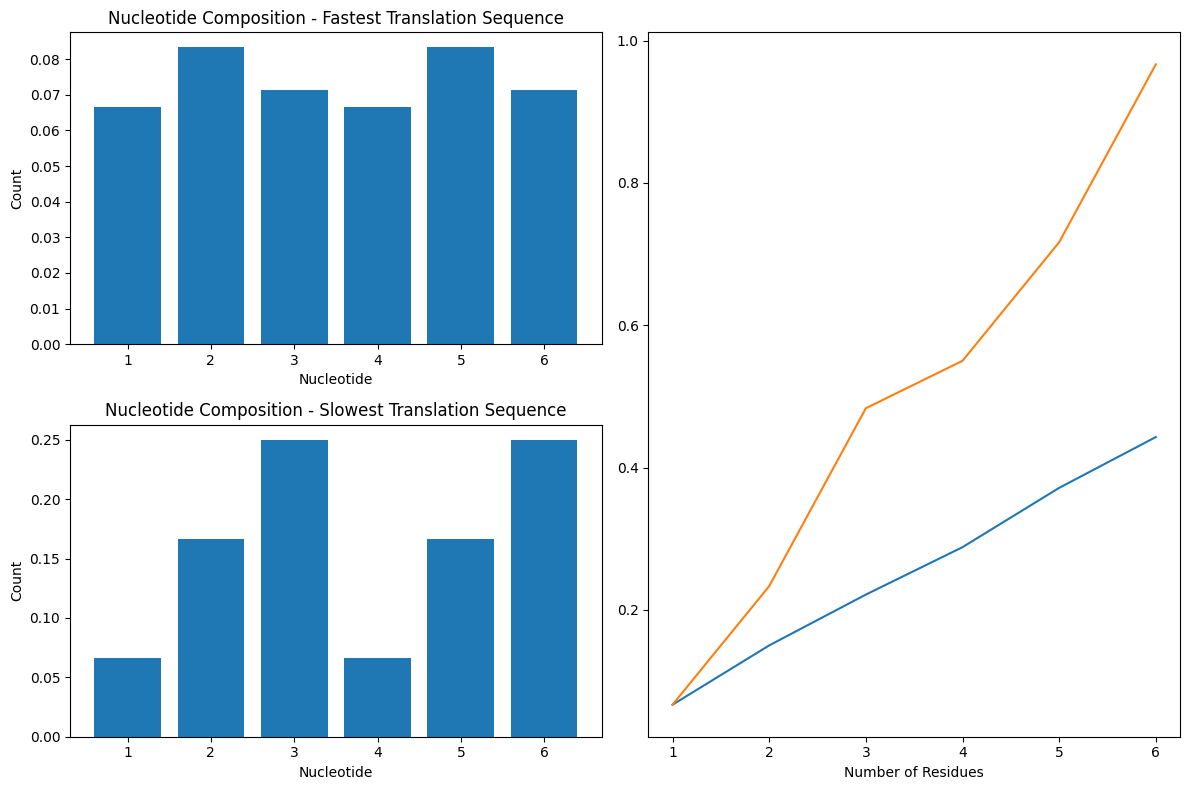

In [34]:
# Input: protein sequence
protein_input = ProteinSequence('MGRMGR')

# Reverse translate
dna_seq = reverse_translate(protein_input, sequence_num=1)
print(f"DNA candidate: {dna_seq}")

# Translate back to protein (frame 0)
protein_check = dna_seq.translate(complete=True) # what happens, if complete=False?
print(f"Translated back: {protein_check}")

# Propose a sequence with the fastest, and the slowest translation time
fastest_translation_sequence = NucleotideSequence('ATGGGCCGAATGGGCCGA')
slowest_translation_sequence = NucleotideSequence('ATGGGACGGATGGGACGG')

# Implement the function calculating the per-residue translation time starting from nucleotide sequence
def per_res_translation_time(nucleotide_seq: str, tRNA_table: dict = tRNA_table) -> ndarray:
    """ Calculate per-residue translation time for a nucleotide sequence """
    translation_time = []
    for batch in itertools.batched(nucleotide_seq, 3):
        abundance = tRNA_table["".join(batch)]
        if abundance != 0:
            translation_time.append(1/abundance)
    return translation_time

# Calculate the translation time for the proposed sequences
fastest_translation_time = per_res_translation_time(fastest_translation_sequence)
slowest_translation_time = per_res_translation_time(slowest_translation_sequence)

# Visualization
# Create a plot with the following subplots:
# 1. Barplot of nucleotide composition of the fastest folding DNA sequence
# 2. Barplot of nucleotide composition of the slowest folding DNA sequence below the first one
# 3. Line plot of total translation time as a function of the number of residues for fastest and slowest folding DNA sequence

# Create figure with subplots: 2 plots in left column, 1 larger plot in right panel
fig = plt.figure(figsize=(12, 8))

# Left column: two subplots stacked vertically
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Top left
ax2 = plt.subplot2grid((2, 2), (1, 0))  # Bottom left

# Right panel: one larger subplot spanning both rows
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)  # Right side, spans both rows

# ax1 - barplot of nucleotide composition of the fastest folding DNA sequence
ax1.bar(range(1, len(fastest_translation_time) + 1), fastest_translation_time)
ax1.set_xlabel('Nucleotide')
ax1.set_ylabel('Count')
ax1.set_title('Nucleotide Composition - Fastest Translation Sequence')

# ax2 - barplot of nucleotide composition of the slowest folding DNA sequence
ax2.bar(range(1, len(slowest_translation_time) + 1), slowest_translation_time)
ax2.set_xlabel('Nucleotide')
ax2.set_ylabel('Count')
ax2.set_title('Nucleotide Composition - Slowest Translation Sequence')

# ax3 - line plot of total translation time as a function of the number of residues for fastest and slowest folding DNA sequence
ax3.plot(range(1, len(fastest_translation_time) + 1), np.cumsum(fastest_translation_time))
ax3.plot(range(1, len(slowest_translation_time) + 1), np.cumsum(slowest_translation_time))
ax3.set_xlabel('Number of Residues')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
